In [ ]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv


--2024-10-22 12:58:38--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2024-10-22 12:58:39 (41.1 MB/s) - ‘moore.csv’ saved [2302/2302]



In [ ]:
data = pd.read_csv('moore.csv', header=None).values
X = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
#make the data 2d arrays

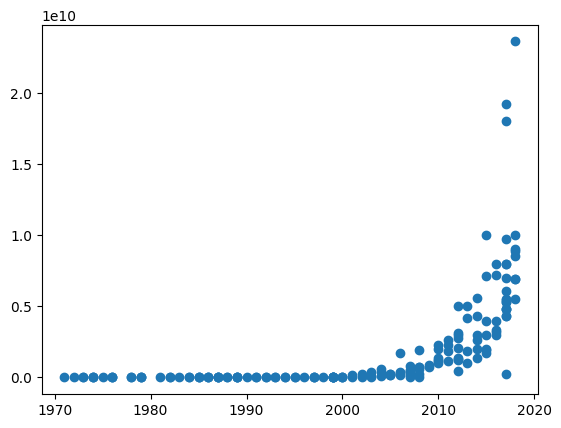

In [ ]:
plt.scatter(X, y)

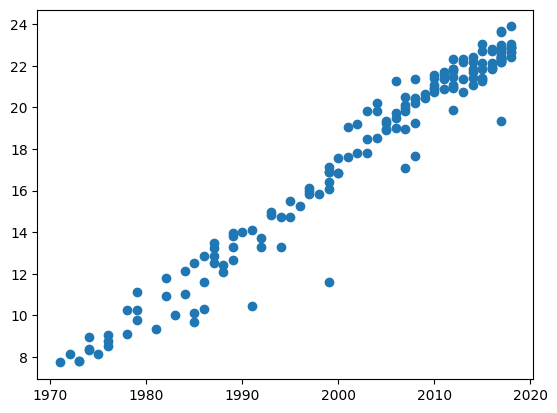

In [ ]:
y = np.log(y)
plt.scatter(X, y)

In [ ]:
mx = X.mean()
my = y.mean()
sx = X.std()
sy = y.std()
x = (X - mx) / sx
y = (y - my) / sy

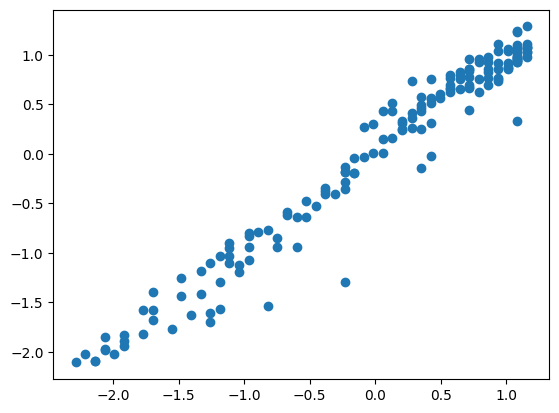

In [ ]:
plt.scatter(x,y)

In [ ]:
#torch tensors
inputs = torch.from_numpy(x.astype(np.float32))
targets = torch.from_numpy(y.astype(np.float32))

In [ ]:
model = nn.Linear(1, 1)

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01,momentum=0.7)

In [ ]:
n_ephochs = 100
losses = []
for epoch in range(n_ephochs):
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()
    print(f'epoch {epoch+1}/{n_ephochs}, loss: {loss.item():.4f}')

epoch 1/100, loss: 3.7204
epoch 2/100, loss: 3.5746
epoch 3/100, loss: 3.3363
epoch 4/100, loss: 3.0471
epoch 5/100, loss: 2.7374
epoch 6/100, loss: 2.4279
epoch 7/100, loss: 2.1321
epoch 8/100, loss: 1.8577
epoch 9/100, loss: 1.6088
epoch 10/100, loss: 1.3866
epoch 11/100, loss: 1.1908
epoch 12/100, loss: 1.0198
epoch 13/100, loss: 0.8718
epoch 14/100, loss: 0.7443
epoch 15/100, loss: 0.6351
epoch 16/100, loss: 0.5420
epoch 17/100, loss: 0.4628
epoch 18/100, loss: 0.3957
epoch 19/100, loss: 0.3389
epoch 20/100, loss: 0.2909
epoch 21/100, loss: 0.2505
epoch 22/100, loss: 0.2164
epoch 23/100, loss: 0.1877
epoch 24/100, loss: 0.1636
epoch 25/100, loss: 0.1434
epoch 26/100, loss: 0.1264
epoch 27/100, loss: 0.1121
epoch 28/100, loss: 0.1002
epoch 29/100, loss: 0.0902
epoch 30/100, loss: 0.0818
epoch 31/100, loss: 0.0747
epoch 32/100, loss: 0.0688
epoch 33/100, loss: 0.0639
epoch 34/100, loss: 0.0598
epoch 35/100, loss: 0.0563
epoch 36/100, loss: 0.0534
epoch 37/100, loss: 0.0510
epoch 38/1

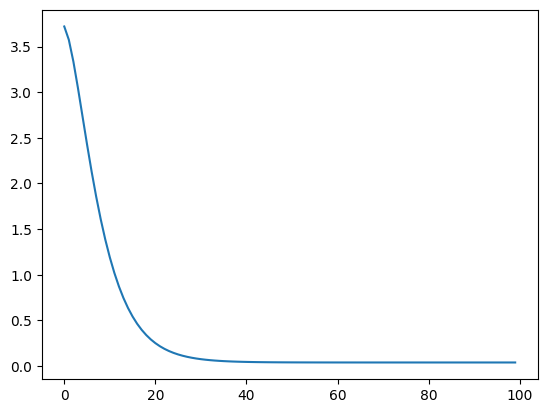

In [ ]:
plt.plot(losses)

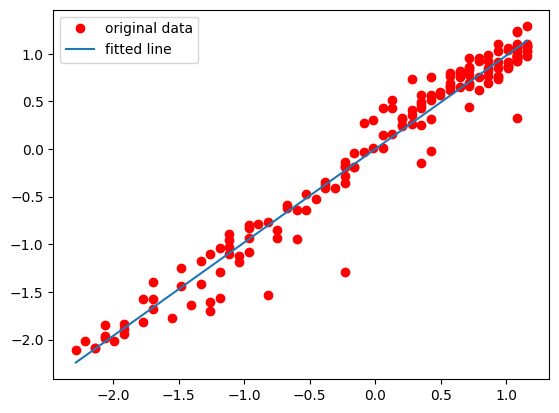

In [ ]:
predicted = model(inputs).detach().numpy()
plt.plot(x, y,'ro',label="original data")
plt.plot(x, predicted,label = 'fitted line')
plt.legend()
plt.show()

In [ ]:
# w is the only learnable parameter as c0 is set.
w = model.weight.data.numpy()
w

array([[0.98021275]], dtype=float32)